# **D208 Predictive Modeling** | Performance Assessment Task 1 (file 2)
## **Churn Data Set**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from statsmodels.formula.api import ols
from statsmodels.api import qqplot 
from itertools import product

In [2]:
df= pd.read_csv('prepared_dataset_churn_D208.csv')
df.head()

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic
0,38,68,28561.99,0,7.978323,1,0,1,1,1,0,1,1,0,1,6.795513,172.455519,904.536110,0,1
1,10446,27,21704.77,1,11.699080,1,1,0,1,1,1,1,0,1,1,1.156681,242.632554,800.982766,0,1
2,3735,50,9609.57,0,10.752800,1,1,1,0,1,1,0,0,0,1,15.754144,159.947583,2054.706961,1,0
3,13863,48,18925.23,0,14.913540,0,1,0,0,1,0,1,0,1,0,17.087227,119.956840,2164.579412,1,0
4,11352,83,40074.19,1,8.147417,1,0,1,0,0,0,0,0,1,0,1.670972,149.948316,271.493436,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Population                   9991 non-null   int64  
 1   Age                          9991 non-null   int64  
 2   Income                       9991 non-null   float64
 3   Churn                        9991 non-null   int64  
 4   Outage_sec_perweek           9991 non-null   float64
 5   Yearly_equip_failure         9991 non-null   int64  
 6   Techie                       9991 non-null   int64  
 7   Port_modem                   9991 non-null   int64  
 8   Tablet                       9991 non-null   int64  
 9   Phone                        9991 non-null   int64  
 10  Multiple                     9991 non-null   int64  
 11  OnlineSecurity               9991 non-null   int64  
 12  OnlineBackup                 9991 non-null   int64  
 13  StreamingTV       

In [4]:
df.rename(columns={'InternetService_Fiber Optic' : 'InternetService_FiberOptic'}, inplace=True)

## **INITIAL MODEL**

In [5]:
model_initial = ols("Bandwidth_GB_Year ~ Population + Age + Income + Churn + Outage_sec_perweek + Yearly_equip_failure + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + MonthlyCharge + InternetService_DSL + InternetService_FiberOptic + 0",
                   data=df).fit()

In [6]:
model_initial.params

Population                     -0.000032
Age                            -3.341518
Income                          0.000008
Churn                           1.615239
Outage_sec_perweek              0.554219
Yearly_equip_failure            0.598777
Techie                         -1.185462
Port_modem                      2.134460
Tablet                         -0.205077
Phone                          -0.099012
Multiple                      -39.931408
OnlineSecurity                 69.270554
OnlineBackup                   18.426173
StreamingTV                    86.657331
StreamingMovies                36.896790
Tenure                         81.908033
MonthlyCharge                   3.356977
InternetService_DSL           370.050618
InternetService_FiberOptic   -109.820567
dtype: float64

In [7]:
mse = model_initial.mse_resid
print('mse: ' , mse)

rse = np.sqrt(mse)
print('rse: ', rse)

mse:  6420.743012326673
rse:  80.12953894991955


The difference between predicted values and observed values is typically 80

In [8]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.332e+06
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:08:48   Log-Likelihood:                         -57964.
No. Observations:                9991   AIC:                                  1.160e+05
Df Residuals:                    9972   BIC:                                  1.161e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Population                 -3.164e-05   5.58e-05     -0.567      0.571      -0.000    7.77e-05
Age                           -3.3415      0.037    -89.230      0.000      -3.415      -3.268
Income                      8.032e-06   2.85e-05      0.282      0.778   -4.78e-05    6.38e-05
Churn                          1.6152      2.377      0.680      0.497      -3.044       6.274
Outage_sec_perweek             0.5542      0.251      2.208      0.027       0.062       1.046
Yearly_equip_failure           0.5988      1.263      0.474      0.636      -1.878       3.075
Techie                        -1.1855      2.152     -0.551      0.582      -5.404       3.033
Port_modem                     2.1345      1.596      1.337      0.181      -0.994       5.263
Tablet                        -0.2051      1.749     -0.117      0.907      -3.634       3.224
Phone                         -0.0990      2.575     -0.038      0.969      -5.146       4.948
Multiple                     -39.9314      2.284    -17.483      0.000     -44.409     -35.454
OnlineSecurity                69.2706      1.686     41.083      0.000      65.965      72.576
OnlineBackup                  18.4262      1.992      9.251      0.000      14.522      22.331
StreamingTV                   86.6573      2.639     32.838      0.000      81.484      91.830
StreamingMovies               36.8968      3.010     12.257      0.000      30.996      42.797
Tenure                        81.9080      0.036   2294.557      0.000      81.838      81.978
MonthlyCharge                  3.3570      0.046     72.714      0.000       3.266       3.447
InternetService_DSL          370.0506      2.358    156.965      0.000     365.429     374.672
InternetService_FiberOptic  -109.8206      2.792    -39.340      0.000    -115.293    -104.348
==============================================================================
Omnibus:                     1040.048   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1461.231
Skew:                           0.821   Prob(JB):                         0.00
Kurtosis:                       3.902   Cond. No.                     2.97e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **R^2 = 1 suggesting the model overfit the data**

## **REDUCED MODEL**

In [9]:
corr_matrix = round(df.corr(), 2)
corr_matrix

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic
Population,1.00,0.01,-0.01,-0.01,0.00,-0.00,-0.01,0.01,-0.00,0.01,-0.00,0.01,0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.00
Age,0.01,1.00,-0.00,0.01,-0.01,0.01,-0.01,0.01,-0.00,0.01,-0.00,-0.01,0.00,0.00,0.01,0.02,0.01,-0.01,-0.00,0.00
Income,-0.01,-0.00,1.00,0.01,-0.01,0.00,0.00,-0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.01,-0.00,0.00,-0.00,0.00,0.02,-0.02
Churn,-0.01,0.01,0.01,1.00,-0.00,-0.02,0.07,0.01,-0.00,-0.03,0.13,-0.01,0.05,0.23,0.29,-0.49,0.37,-0.44,0.09,-0.06
Outage_sec_perweek,0.00,-0.01,-0.01,-0.00,1.00,0.00,-0.01,0.01,0.01,-0.01,0.01,-0.00,0.00,0.01,0.02,0.00,0.02,0.00,-0.01,0.00
Yearly_equip_failure,-0.00,0.01,0.00,-0.02,0.00,1.00,-0.01,0.01,0.00,-0.01,0.00,-0.02,-0.01,0.00,-0.00,0.01,-0.01,0.01,0.01,-0.00
Techie,-0.01,-0.01,0.00,0.07,-0.01,-0.01,1.00,-0.01,0.01,-0.00,-0.00,-0.01,0.01,0.00,-0.00,-0.01,0.01,-0.01,0.00,0.00
Port_modem,0.01,0.01,-0.01,0.01,0.01,0.01,-0.01,1.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.01,0.01,-0.00,0.01,-0.00,0.00
Tablet,-0.00,-0.00,0.00,-0.00,0.01,0.00,0.01,0.00,1.00,0.02,-0.02,0.01,-0.00,0.02,0.02,0.00,0.01,0.00,0.00,-0.01
Phone,0.01,0.01,-0.00,-0.03,-0.01,-0.01,-0.00,0.00,0.02,1.00,0.00,0.00,-0.00,-0.01,-0.00,0.00,-0.02,0.00,0.00,-0.01


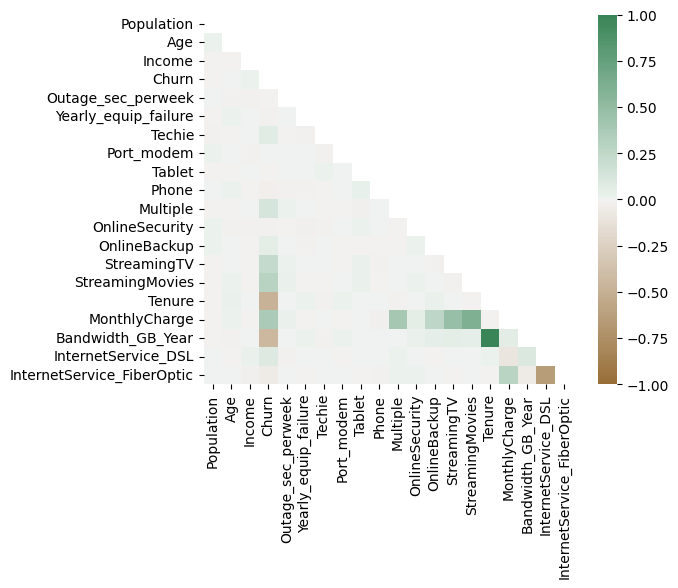

In [10]:
df_corr = df.corr()


mask = np.triu(np.ones_like(df.corr(), dtype=bool))


axis_corr = sns.heatmap(
    df_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 500, n=500),
    mask=mask, 
    square=True
)



In [11]:
#use Variance Inflation Factor (VIF) to detect multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [12]:
def compute_vif(considered_features):
    X = df[considered_features]
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif


In [13]:
considered_features = ['Population',
                       'Age', 
                       'Income',
                       'Churn',
                       'Outage_sec_perweek',
                       'Yearly_equip_failure',
                       'Techie',
                       'Port_modem',
                       'Tablet',
                       'Phone',
                       'Multiple',
                       'OnlineSecurity',
                       'OnlineBackup',
                       'StreamingTV',
                       'StreamingMovies',
                       'Tenure',
                       'MonthlyCharge',
                       'InternetService_DSL',
                       'InternetService_FiberOptic']

compute_vif(considered_features).sort_values('VIF', ascending = False)

,Variable,VIF
16,MonthlyCharge,12.310439
14,StreamingMovies,5.531968
13,StreamingTV,3.939856
18,InternetService_FiberOptic,3.452173
10,Multiple,2.729997
17,InternetService_DSL,1.970133
12,OnlineBackup,1.837850
3,Churn,1.713359
15,Tenure,1.403835
11,OnlineSecurity,1.016288


In [14]:
considered_features.remove('MonthlyCharge')
compute_vif(considered_features).sort_values('VIF', ascending = False)

C:\Users\kaili\AppData\Local\Temp\ipykernel_25464\760311615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
16,InternetService_DSL,1.735322
17,InternetService_FiberOptic,1.718507
3,Churn,1.688949
15,Tenure,1.400407
14,StreamingMovies,1.143757
13,StreamingTV,1.093644
10,Multiple,1.027283
6,Techie,1.007577
12,OnlineBackup,1.007431
8,Tablet,1.002248


#### **'MonthlyCharge' had a high VIF. When dropped all considered features have VIF ~ 1**
 - will drop 'MonthlyCharge' from df and run ols again

In [15]:
df.drop(columns='MonthlyCharge', inplace=True)

In [16]:
df.head()

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic
0,38,68,28561.99,0,7.978323,1,0,1,1,1,0,1,1,0,1,6.795513,904.536110,0,1
1,10446,27,21704.77,1,11.699080,1,1,0,1,1,1,1,0,1,1,1.156681,800.982766,0,1
2,3735,50,9609.57,0,10.752800,1,1,1,0,1,1,0,0,0,1,15.754144,2054.706961,1,0
3,13863,48,18925.23,0,14.913540,0,1,0,0,1,0,1,0,1,0,17.087227,2164.579412,1,0
4,11352,83,40074.19,1,8.147417,1,0,1,0,0,0,0,0,1,0,1.670972,271.493436,0,1


In [17]:
model_reduced = ols("Bandwidth_GB_Year ~ Population + Age + Income + Churn + Outage_sec_perweek + Yearly_equip_failure + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic + 0",
                   data=df).fit()

In [18]:
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          9.188e+05
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:08:50   Log-Likelihood:                         -60089.
No. Observations:                9991   AIC:                                  1.202e+05
Df Residuals:                    9973   BIC:                                  1.203e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Population                     0.0002   6.89e-05      3.294      0.001    9.19e-05       0.000
Age                           -2.5289      0.044    -57.201      0.000      -2.616      -2.442
Income                         0.0004   3.47e-05     10.764      0.000       0.000       0.000
Churn                         28.3434      2.905      9.758      0.000      22.650      34.037
Outage_sec_perweek             7.8026      0.285     27.376      0.000       7.244       8.361
Yearly_equip_failure           6.4427      1.560      4.131      0.000       3.386       9.500
Techie                         8.8475      2.656      3.331      0.001       3.640      14.055
Port_modem                    12.9585      1.966      6.592      0.000       9.105      16.812
Tablet                         6.2089      2.161      2.873      0.004       1.973      10.445
Phone                         64.7250      2.988     21.662      0.000      58.868      70.582
Multiple                      77.1835      2.003     38.530      0.000      73.257      81.110
OnlineSecurity                89.4764      2.057     43.496      0.000      85.444      93.509
OnlineBackup                 104.3004      1.984     52.569      0.000     100.411     108.190
StreamingTV                  235.5299      2.060    114.356      0.000     231.493     239.567
StreamingMovies              217.1388      2.113    102.782      0.000     212.998     221.280
Tenure                        82.3852      0.043   1898.145      0.000      82.300      82.470
InternetService_DSL          440.4779      2.659    165.673      0.000     435.266     445.690
InternetService_FiberOptic    29.1081      2.518     11.562      0.000      24.173      34.043
==============================================================================
Omnibus:                      525.822   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.928
Skew:                           0.561   Prob(JB):                    1.21e-136
Kurtosis:                       3.493   Cond. No.                     1.72e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
mse = model_initial.mse_resid
print('mse: ' , mse)

rse = np.sqrt(mse)
print('rse: ', rse)

mse:  6420.743012326673
rse:  80.12953894991955


In [23]:
model_reduced.params

Population                      0.000227
Age                            -2.528943
Income                          0.000373
Churn                          28.343370
Outage_sec_perweek              7.802639
Yearly_equip_failure            6.442750
Techie                          8.847485
Port_modem                     12.958475
Tablet                          6.208883
Phone                          64.725042
Multiple                       77.183494
OnlineSecurity                 89.476375
OnlineBackup                  104.300401
StreamingTV                   235.529869
StreamingMovies               217.138781
Tenure                         82.385158
InternetService_DSL           440.477885
InternetService_FiberOptic     29.108056
dtype: float64

## R^2 = 0.99 suggesting the model overfit the data -- will drop parameters near 0 and rerun model.

In [24]:
df.drop(columns=['Population', 'Income'] , inplace=True)
df.head()

,Age,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic
0,68,0,7.978323,1,0,1,1,1,0,1,1,0,1,6.795513,904.536110,0,1
1,27,1,11.699080,1,1,0,1,1,1,1,0,1,1,1.156681,800.982766,0,1
2,50,0,10.752800,1,1,1,0,1,1,0,0,0,1,15.754144,2054.706961,1,0
3,48,0,14.913540,0,1,0,0,1,0,1,0,1,0,17.087227,2164.579412,1,0
4,83,1,8.147417,1,0,1,0,0,0,0,0,1,0,1.670972,271.493436,0,1


In [25]:
model_reduced2 = ols("Bandwidth_GB_Year ~ Age + Churn + Outage_sec_perweek + Yearly_equip_failure + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic + 0",
                   data=df).fit()

In [27]:
model_reduced2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.021e+06
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:30:51   Log-Likelihood:                         -60153.
No. Observations:                9991   AIC:                                  1.203e+05
Df Residuals:                    9975   BIC:                                  1.205e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -2.4761      0.044    -55.984      0.000      -2.563      -2.389
Churn                         29.4053      2.921     10.066      0.000      23.679      35.131
Outage_sec_perweek             8.2704      0.284     29.151      0.000       7.714       8.826
Yearly_equip_failure           6.8810      1.569      4.386      0.000       3.806       9.956
Techie                         9.3724      2.673      3.507      0.000       4.133      14.611
Port_modem                    13.5538      1.977      6.855      0.000       9.678      17.430
Tablet                         6.7903      2.174      3.123      0.002       2.529      11.052
Phone                         69.4248      2.977     23.322      0.000      63.590      75.260
Multiple                      77.8429      2.015     38.633      0.000      73.893      81.793
OnlineSecurity                90.0312      2.069     43.510      0.000      85.975      94.087
OnlineBackup                 104.9578      1.995     52.598      0.000     101.046     108.869
StreamingTV                  236.0090      2.072    113.896      0.000     231.947     240.071
StreamingMovies              217.5837      2.126    102.367      0.000     213.417     221.750
Tenure                        82.4128      0.044   1889.951      0.000      82.327      82.498
InternetService_DSL          442.8037      2.667    166.011      0.000     437.575     448.032
InternetService_FiberOptic    30.9922      2.528     12.261      0.000      26.037      35.947
==============================================================================
Omnibus:                      534.854   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.555
Skew:                           0.567   Prob(JB):                    2.19e-139
Kurtosis:                       3.500   Cond. No.                         237.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Practical significance - i will drop the following parameters to increase the practical significance of the model:
- population
- income
  

In [28]:
model_reduced2.params

Age                            -2.476056
Churn                          29.405319
Outage_sec_perweek              8.270367
Yearly_equip_failure            6.881027
Techie                          9.372361
Port_modem                     13.553792
Tablet                          6.790292
Phone                          69.424836
Multiple                       77.842896
OnlineSecurity                 90.031153
OnlineBackup                  104.957760
StreamingTV                   236.008992
StreamingMovies               217.583725
Tenure                         82.412817
InternetService_DSL           442.803705
InternetService_FiberOptic     30.992216
dtype: float64

In [29]:
mse = model_reduced2.mse_resid
print('mse: ' , mse)

rse = np.sqrt(mse)
print('rse: ', rse)

mse:  9948.153686673566
rse:  99.74043155447828


## **RESIDUAL PLOTS**

In [20]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Age Residuals')

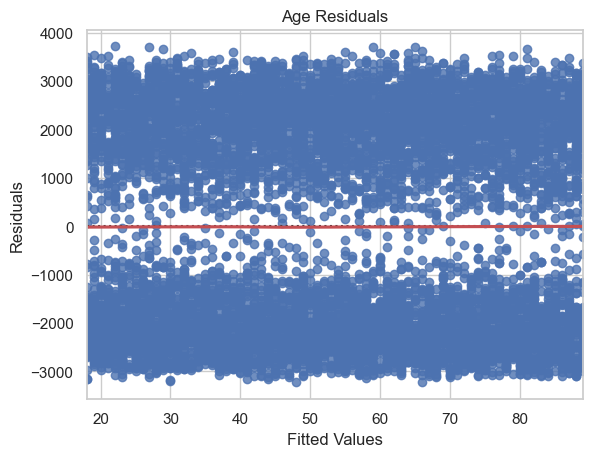

In [30]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Age',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Age Residuals")

Text(0.5, 1.0, 'Tenure Residuals')

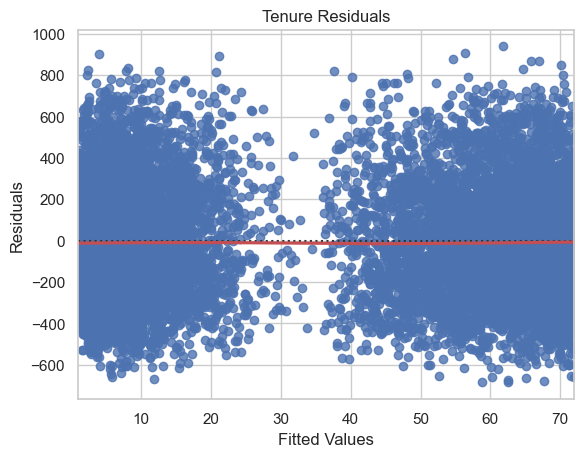

In [22]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Tenure',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Tenure Residuals")

C:\Users\kaili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


Text(0.5, 1.0, 'Churn Residuals')

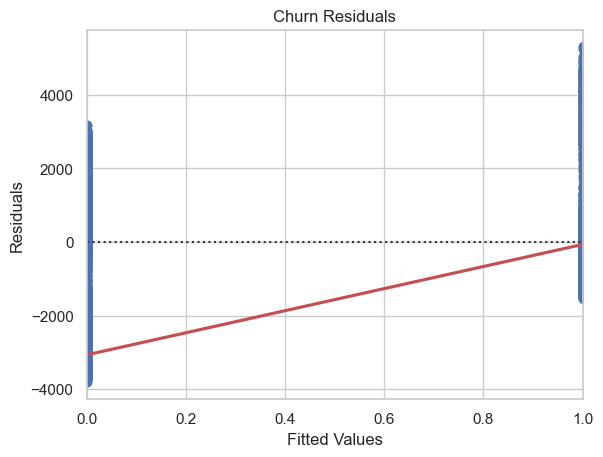

In [31]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Churn',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Churn Residuals")

Text(0.5, 1.0, 'Outage_sec_perweek Residuals')

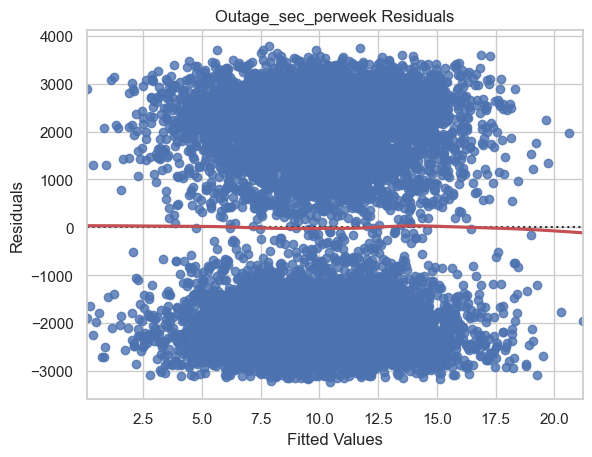

In [32]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Outage_sec_perweek',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Outage_sec_perweek Residuals")

Text(0.5, 1.0, 'Yearly_equip_failure Residuals')

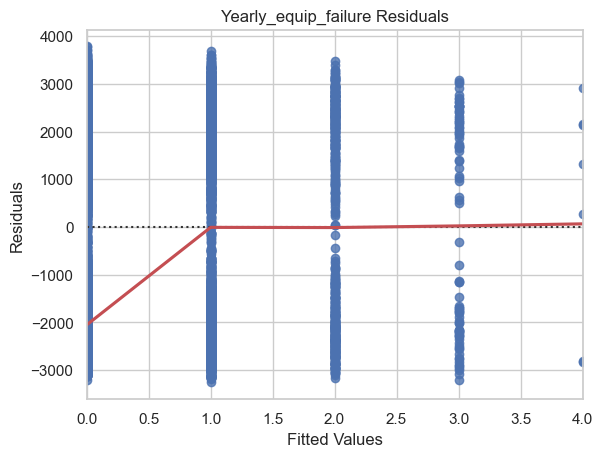

In [33]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Yearly_equip_failure',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Yearly_equip_failure Residuals")

Text(0.5, 1.0, 'Techie Residuals')

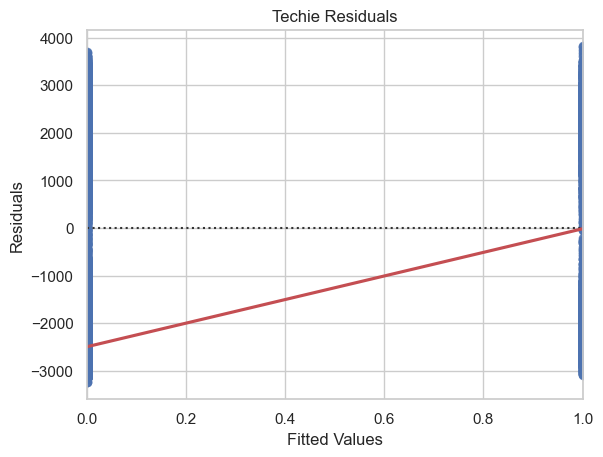

In [34]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Techie',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Techie Residuals")

Text(0.5, 1.0, 'Port_modem Residuals')

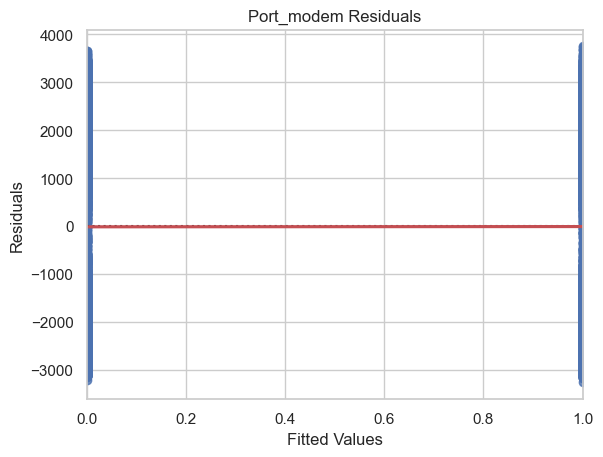

In [35]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Port_modem',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Port_modem Residuals")

Text(0.5, 1.0, 'Tablet Residuals')

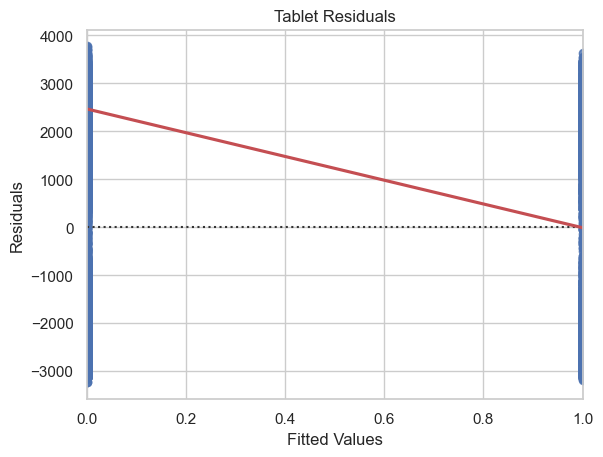

In [36]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Tablet',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Tablet Residuals")

Text(0.5, 1.0, 'Phone Residuals')

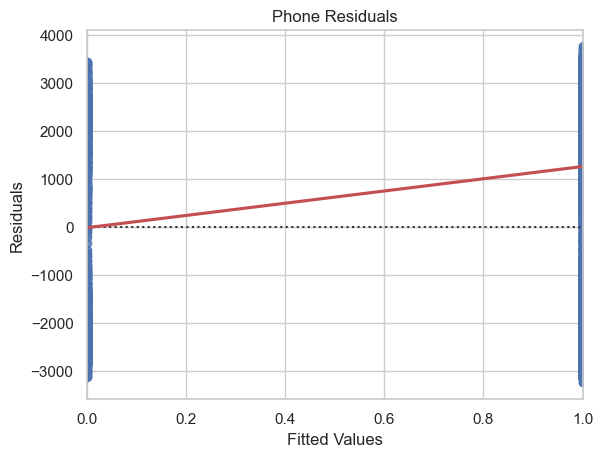

In [37]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Phone',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Phone Residuals")

Text(0.5, 1.0, 'Multiple Residuals')

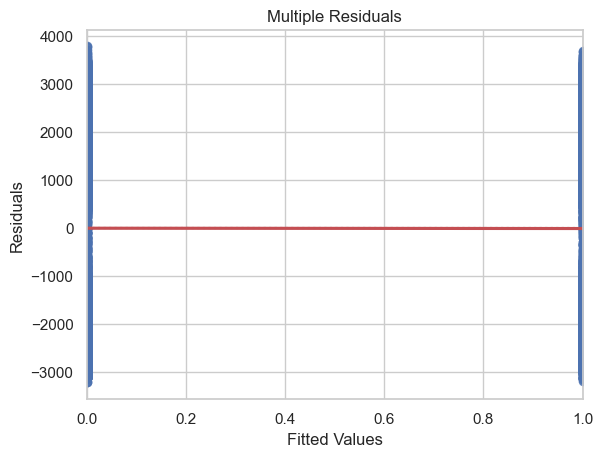

In [38]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Multiple',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Multiple Residuals")

Text(0.5, 1.0, 'OnlineSecurity Residuals')

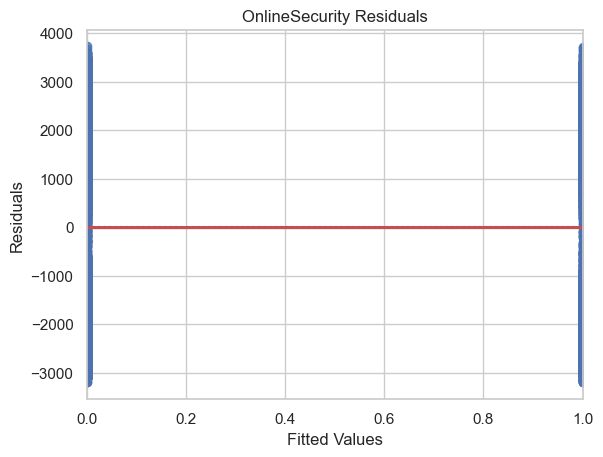

In [39]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'OnlineSecurity',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("OnlineSecurity Residuals")

Text(0.5, 1.0, 'OnlineBackup Residuals')

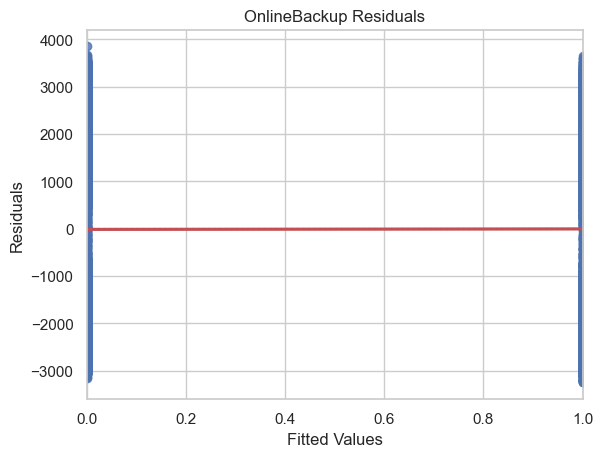

In [40]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'OnlineBackup',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("OnlineBackup Residuals")

Text(0.5, 1.0, 'StreamingTV Residuals')

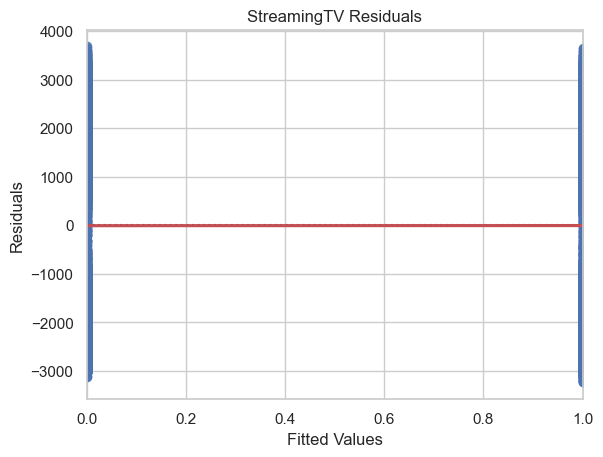

In [42]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'StreamingTV',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("StreamingTV Residuals")

Text(0.5, 1.0, 'StreamingMovies Residuals')

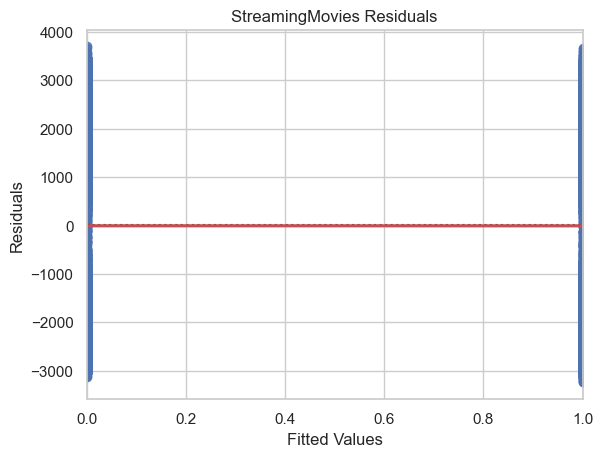

In [43]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'StreamingMovies',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("StreamingMovies Residuals")

Text(0.5, 1.0, 'InternetService_DSL Residuals')

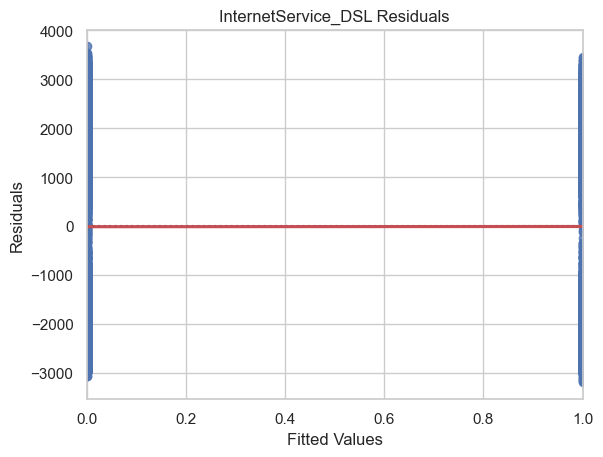

In [44]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'InternetService_DSL',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("InternetService_DSL Residuals")

Text(0.5, 1.0, 'InternetService_FiberOptic Residuals')

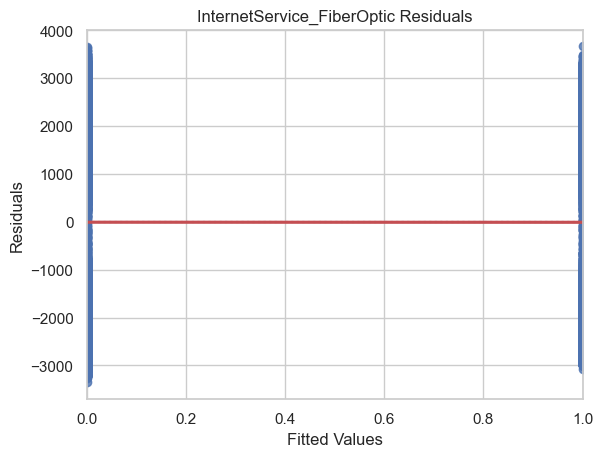

In [45]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'InternetService_FiberOptic',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,
             line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("InternetService_FiberOptic Residuals")